In [1]:
### Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 


In [2]:
### Load in Stock Data
tickers = ['GOOG', 'AAPL']
start_date = '2018-01-01'

def import_stock_data(tickers, start_date):
    data = pd.DataFrame()
    if len([tickers]) == 1:
        data[tickers] = yf.download(tickers, start_date)['Adj Close']
        data = pd.DataFrame(data)
    else:
        for t in tickers:
            data[t] = yf.download(tickers, start_date)['Adj Close']
    # Reset index to make headings in the same row
    data.reset_index(inplace = True)

    data['Date'] = pd.to_datetime(data['Date'])

    return data

stock_data = import_stock_data(tickers, start_date)
stock_data


[*********************100%%**********************]  2 of 2 completed


,Date,GOOG,AAPL
0,2018-01-02,40.670979,53.250000
1,2018-01-03,40.663895,54.124001
2,2018-01-04,40.852779,54.320000
3,2018-01-05,41.317890,55.111500
4,2018-01-08,41.164425,55.347000
...,...,...,...
1581,2024-04-16,169.380005,156.000000
1582,2024-04-17,168.000000,156.880005
1583,2024-04-18,167.039993,157.460007
1584,2024-04-19,165.000000,155.720001


In [6]:
### MACD Function for Multiple Stocks
def get_macd(tickers, df):
    # Initialize empty DataFrame to store MACD data
    macd_df = pd.DataFrame(index=df.index)
    macd_vals = {}

    # Loop for MACD calculation and df population
    for t in tickers:
        # Calculate 12-day Exponential Moving Averages (EMA)
        ema_12 = df[t].ewm(span=12, adjust=False).mean()
        # Calculate 26-day Exponential Moving Averages (EMA)
        ema_26 = df[t].ewm(span=26, adjust=False).mean()
        # Calculate MACD line (12-day EMA minus 26-day EMA)
        macd = ema_12 - ema_26
        # Add MACD column to the DataFrame
        macd_df[t] = macd
        # Append last MACD value to rsi_vals dictionary
        macd_vals[t] = macd_df[t].iloc[-1]

    return macd_df, macd_vals

macd_df, macd_vals = get_macd(tickers, stock_data)
print(macd_df.tail())
print("MACD values list: ", macd_vals)

          GOOG      AAPL
1581 -1.172502  3.479657
1582 -1.358706  3.302301
1583 -1.565690  3.171982
1584 -1.872749  2.894929
1585 -2.024972  2.822765
MACD values list:  {'GOOG': -2.0249716099708905, 'AAPL': 2.822764891256867}


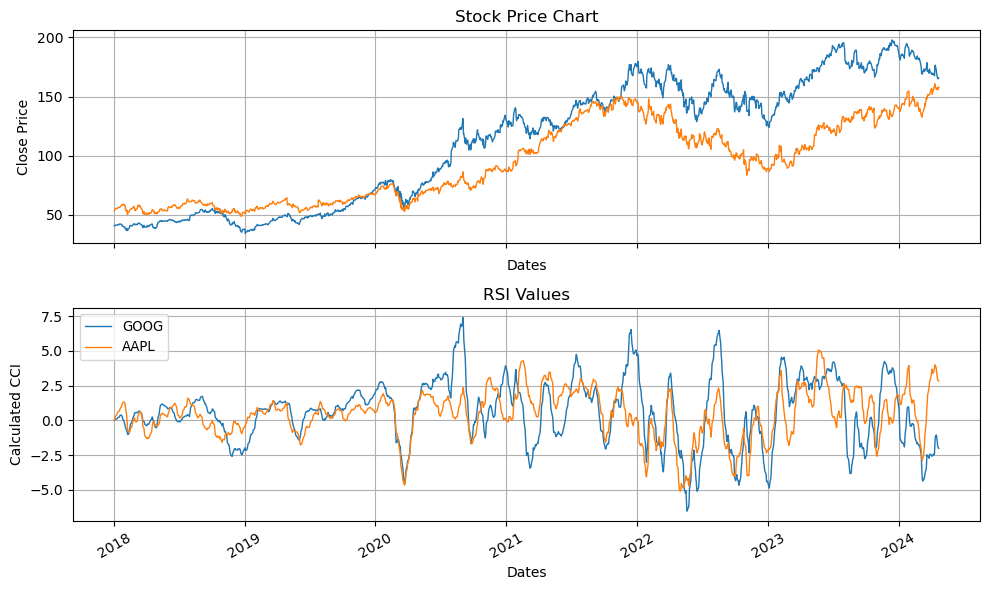

In [7]:
### Plot RSI and Stock Dataframes
# Convert 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Filter stock_data and mult_adx based on start_date
start_date = pd.Timestamp('2024-01-01')  # Assuming start_date is '2024-01-01'
filtered_stock_data = stock_data[stock_data['Date'] >= start_date]
filtered_mult_adx = macd_df[macd_df.index.isin(filtered_stock_data.index)]

# Plot Stocks Analyzed
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
for t in tickers:
    plt.plot(stock_data['Date'], stock_data[t], lw = 1, label = tickers)
plt.title('Stock Price Chart')
plt.ylabel('Close Price')
plt.xlabel('Dates')
plt.grid(True)

# Add ADX Subplot
bx = fig.add_subplot(2, 1, 2)
for t in tickers:
    plt.plot(stock_data['Date'], macd_df[t], lw = 1, label = t)
plt.title('MACD Values')
plt.legend(loc=2, prop={'size': 9.5})
plt.ylabel('Calculated MACD')
plt.xlabel('Dates')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation = 30)
plt.tight_layout()
plt.show()